<a href="https://colab.research.google.com/github/XavierCarrera/platzi-master-ml-exercises/blob/main/Mall_Clients_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

[EN]

For this problem, we're going to analyze a dataset that contains data regarding a mall's customers. The main goal of this exercise is to segment them by their business value. 

The main aproach to solve this problem is to cluster customers observing the feauters in the dataset. Because no laebls are provided, we're going to use a K-means algorithm for this case.

[ES]

Para este problema, vamos a analizar un dataset que contiene datos sobre los clientes de un centro comercial. El objetivo del ejercicio es segmentarlos por su valor de negocio.

La aproximación principal para resolver este problema es agrupar los clientes observando las features del dataset. Debido a que no se dan etiquetas, vamos a utilizar el algoritmo K-means para este caso. 

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [149]:
df = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/db/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


[EN]

At this point, the only feature that provides no added value to analyze the problem is the Customer ID. Thus, we're dropping such variable.

[ES]

En este punto, el único feature que no da ningún valor agreado para analizar el problema es el Cusotmer ID. Por ello, eliminaremos dicha variable. 

In [150]:
df.drop(["CustomerID"], axis=1, inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


[EN]

Before starting the analysis, we verify any null value. 

[ES]

Antes de comenzar el análisis, verificamos si hay algún valor nulo.

In [151]:
df.isnull().sum().sum()

0

# Exploratory Data Analysis

[EN]

For the EDA process, we're going to focus on looking for obvious patterns that might exist among our features. Therefore, the following charts and plots will provide us an insight of the remaining features.

[ES]

Para en análisis exploratorio de datos, nos enfocaremos en buscar patrones obvios que existan entre nuestros features. Por consiguiente, las siguienets tablas y gráficas nos daran una perspectiva sobre las features restantes.

In [152]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


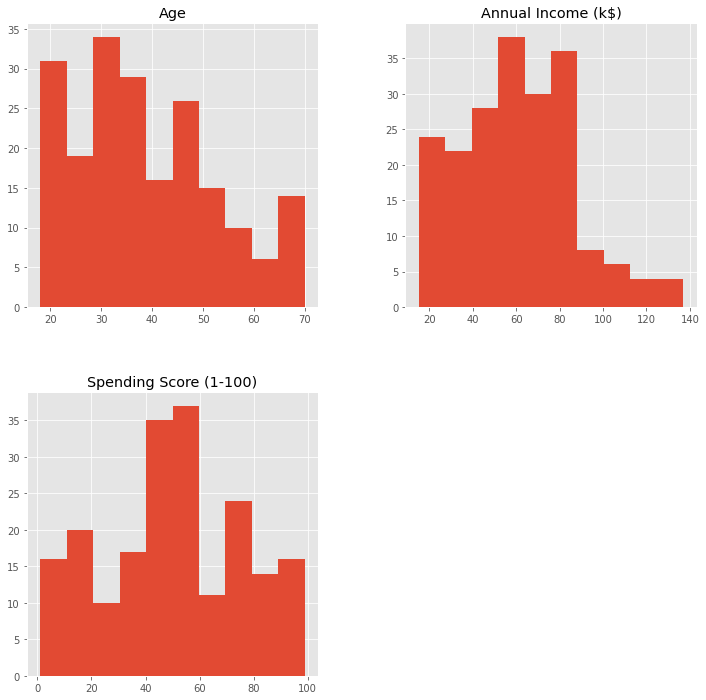

In [154]:
df.hist(figsize=(12,12))
plt.show()

[EN]

First observation: The numeric values doesn't strictly have a Gaussian distribution. The Spending Score is the most evenly distributed variable. It's also an interesting feature to analyze, so we're going to use it as an dependet variable. 

[ES]

Primera observación: Los valores numéricos no tienen estrictamente una distribución gausiana. El Spending Score es la variable que tiene mayor distribución. Es también un feature interesante de analizar, por lo que lo usaremos como variable dependiente. 

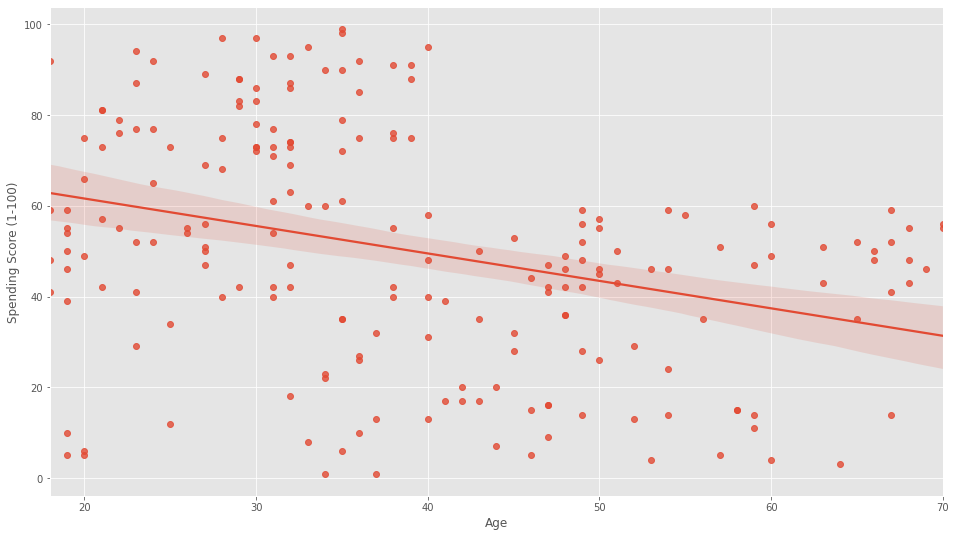

In [156]:
sns.regplot(x=df["Age"], y=df["Spending Score (1-100)"])

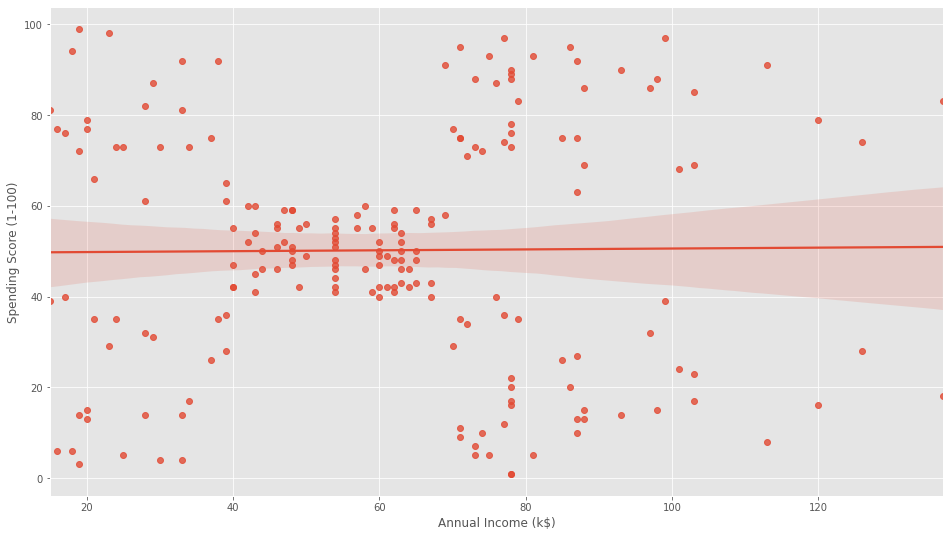

In [157]:
sns.regplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"])

[EN]

Second observation: The scatter plots show no linear distribution among our data. There's no obvious pattern in the Age-Spending Score pair. However, there's certain symmetry on the Annual Income-Spending Score pair -- thus, we're going to look in to it closer.

[ES]

Segunda observación: El gráfico de dispersión no muestra una distribución lineal en nuestros datos. No hay un patrón obio en el par Age-Spending Score. Sin embargo, hay cierta simetría en el par Annual Income-Spending Score por lo que lo observaremos más de cerca.

[EN]

Because Genre is a categorical value, we're going to use the get_dummies mehtod to transform it in binary values through two columns.

[ES]

Porque Género es un valor categórico, vamos a usar el método get_dummies para transformarlo en valores binarios por medio de dos columnas.

In [158]:
df = pd.get_dummies(df, prefix=["Gender"], columns=["Genre"])

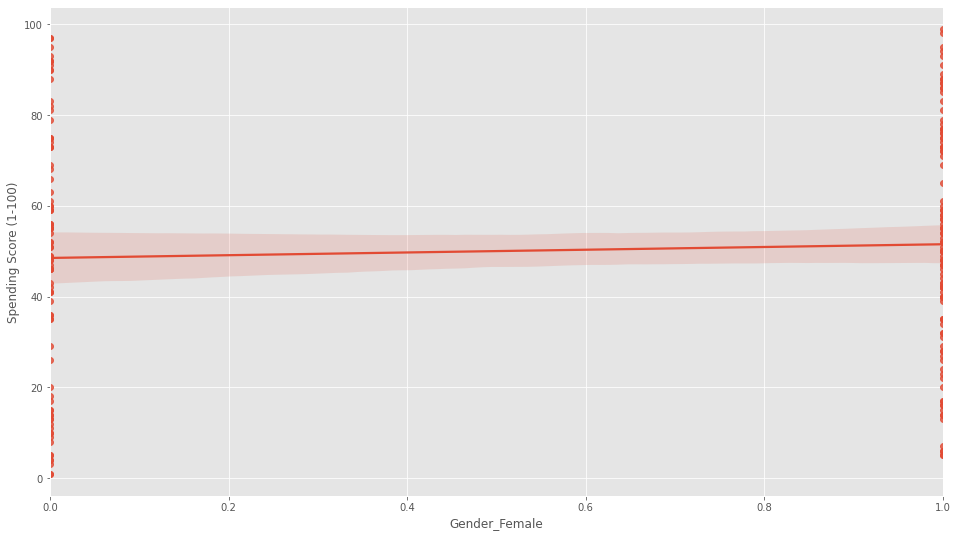

In [165]:
sns.regplot(x=df["Gender_Female"], y=df["Spending Score (1-100)"])

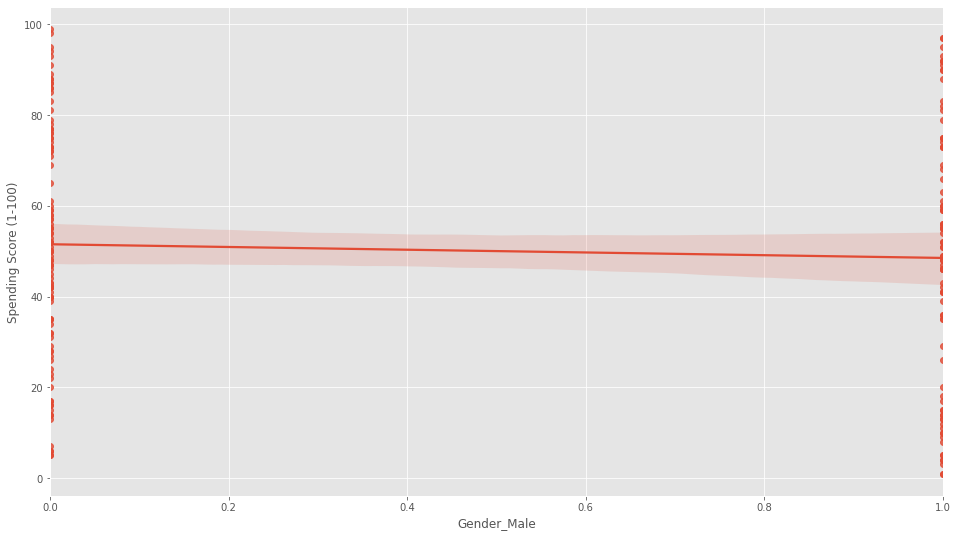

In [162]:
sns.regplot(x=df["Gender_Male"], y=df["Spending Score (1-100)"])

[EN]

Third observation: When using the scatter plot to observe any obvious distribution, we see no correlation. Thus, we're dropping this variable from furter analysis.

[ES]

Tercera observación: Al usar una gráfica de dispersión para observar algúna distrubución obvia, no se correlación alguna. Por lo que eliminaremos dicha variable de un anális más extenso.

# Model Training

[EN]

In order to train our model, we're going to use only the remaining three variables. First, we're going to show our data on a 3D space and then make the Elbow Analysis for our Kmeans algorithm. 

[ES]

Para entrenar nuestro modelo, vamos a usar las variables restantes. Primero, vamos a ubicar nuestros datos en un espacio 3D y luego hacer el Análisis de Codo para nuestro Algoritmo de Kmeans. 

In [123]:
X = np.array(df[["Age","Annual Income (k$)", "Spending Score (1-100)"]])
X.shape

(200, 3)

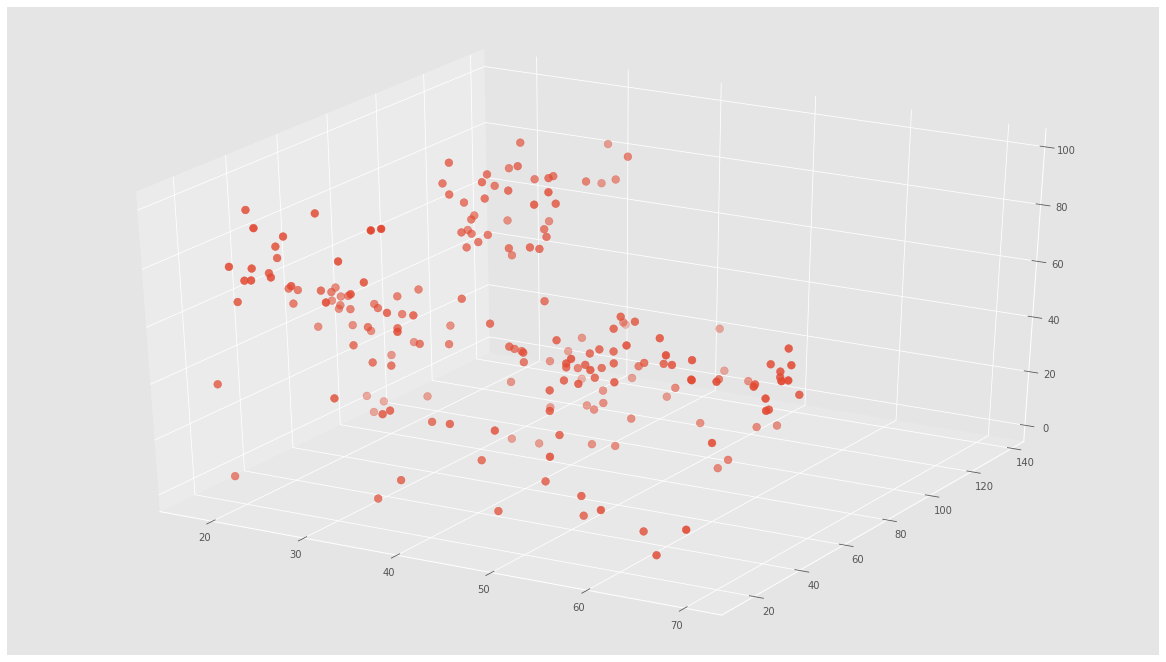

In [131]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=60)

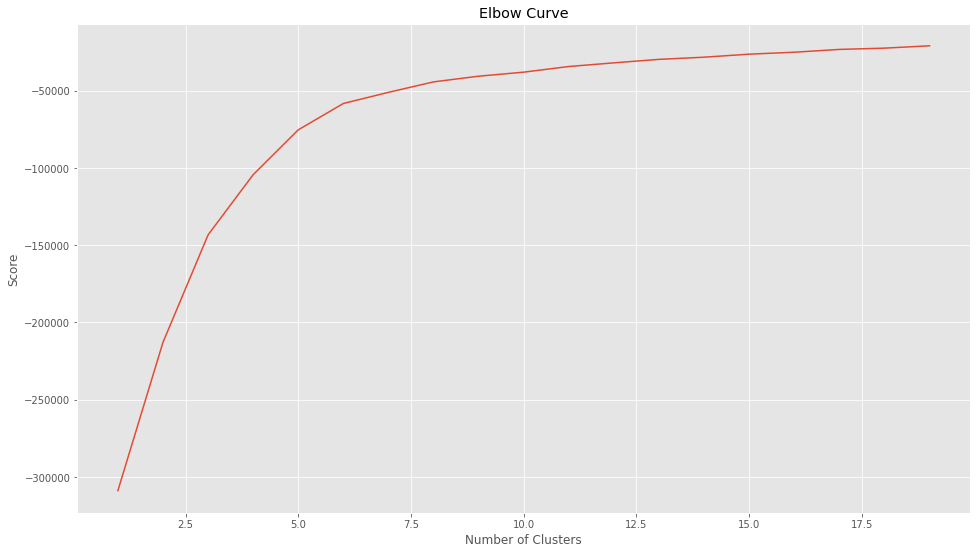

In [135]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[EN]

As we can see, the Elbow Analysis calculates that we need 5 centriods (Kmean) to evenly distribute our data.

[ES]

Como podemos ver, el Análisis de Codo calcula que necesitamos 5 centroides (promedios de grupos) para distribuir igualmente nuestros datos.

[EN]

At this point is important to locate again our distributed data, but now with assigned color groups once our model is trained.

Centroids are identified as stars.

[ES]

En este punto hay que ubicar nuestros datos distribuidos otra vez, pero ahora con grupos de colores asignados una vez que hayamos entrenado el modelo. 

Los centroides quedan identificados como estrellas.

In [136]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.12658228 54.82278481 49.83544304]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]
 [25.27272727 25.72727273 79.36363636]
 [45.2173913  26.30434783 20.91304348]]


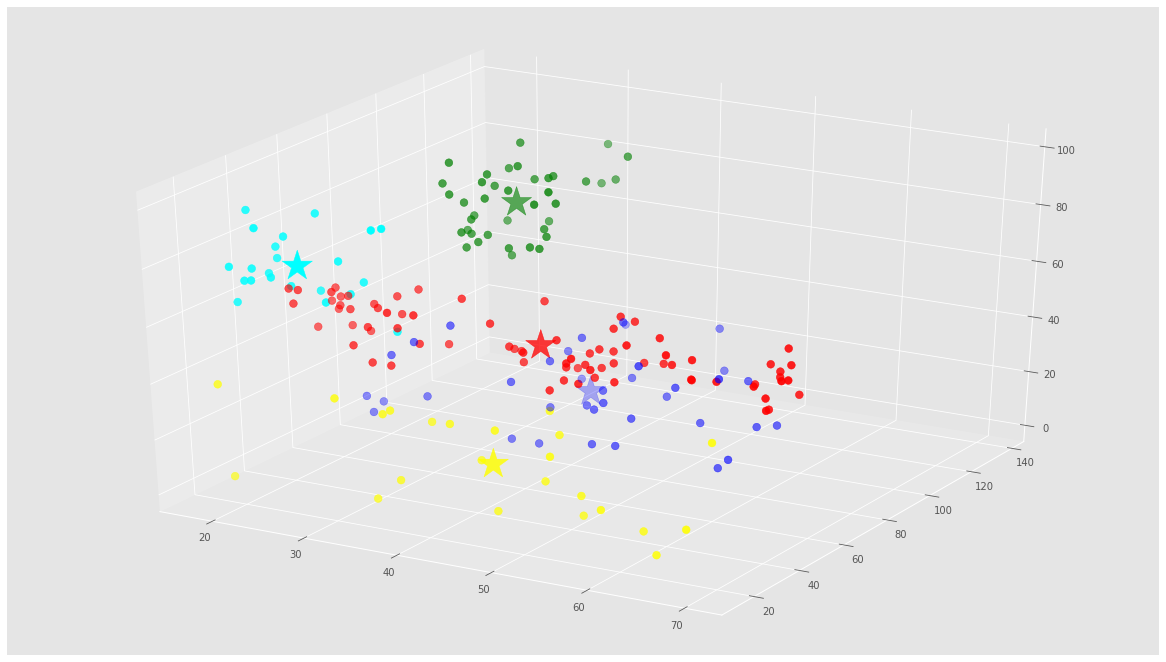

In [137]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow']
assigned=[]
for row in labels:
    assigned.append(colors[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assigned,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

[EN]

We've trained already our model. When we locate our data on a 3D space, only the green group seems to be an obvious separate group from the rest of data points.

[ES]

Hemos entrenado ya nuestro modelo. Al ubicar nuestros datos en un espacio 3D, solo el grupo verde parece ser un grupo obviamente separada del resto de los puntos.

# Model Evaluation

[EN]

Because we haven't find any obvious distribution in the 3D space, we're going to evaluate our model by located our data on 2D spaces.

[ES]

Porque no hemos encontrado una distribución obiva en el espacio 3D, vamos a evaluar nuestro modelo localizando nuestros datos en espacios 2D.

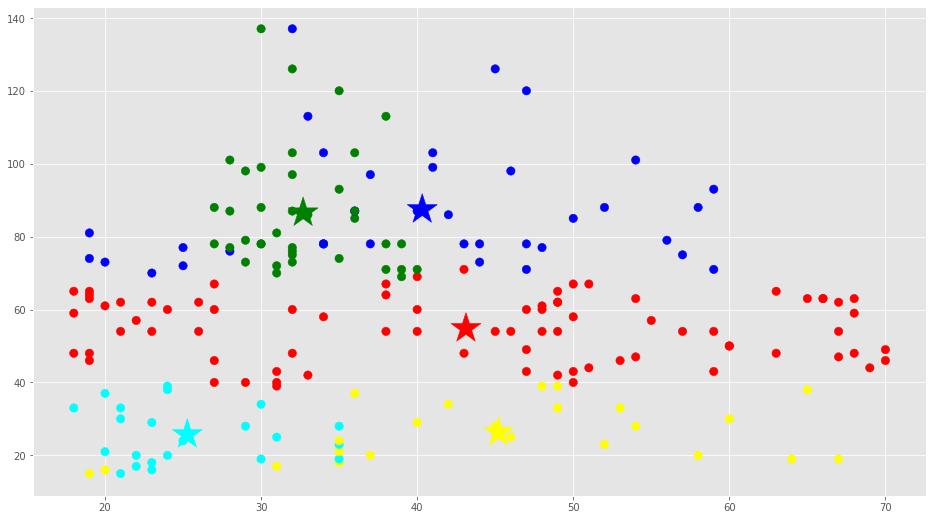

In [140]:
f1 = df['Age'].values
f2 = df['Annual Income (k$)'].values
 
plt.scatter(f1, f2, c=assigned, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

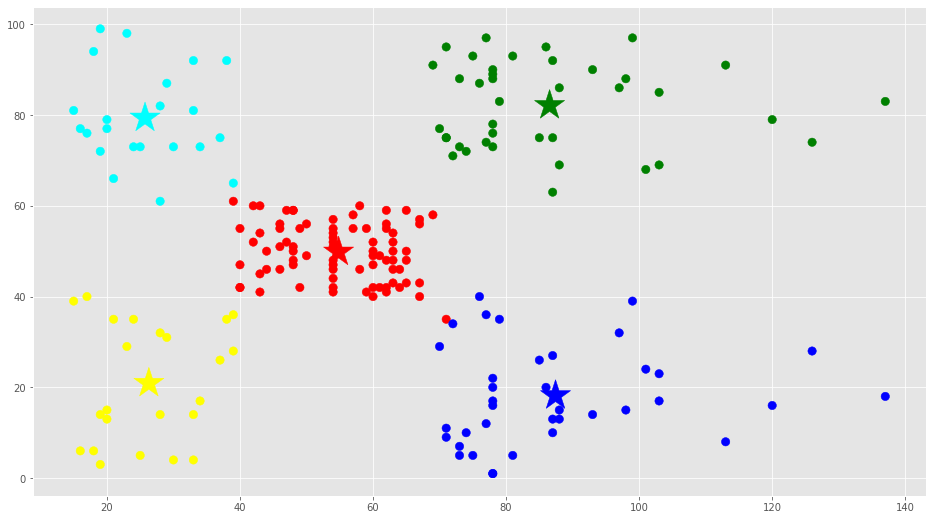

In [142]:
f1 = df['Annual Income (k$)'].values
f2 = df['Spending Score (1-100)'].values
 
plt.scatter(f1, f2, c=assigned, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

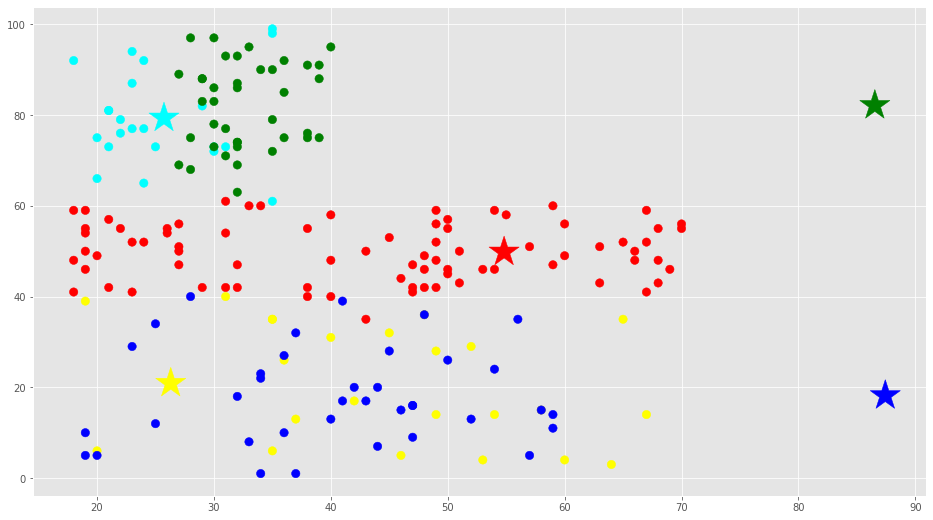

In [143]:
f1 = df['Age'].values
f2 = df['Spending Score (1-100)'].values
 
plt.scatter(f1, f2, c=assigned, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

[EN]

The importance of the latter analysis is to deep on the patterns found by our model. In this case, Age isn't a relevant variable. Thus, in a hypothetical second iteration we might considering dropping such variable. 

We end our model evaluation by grouping our data by color groups.

[ES] 

La importancia del anterior análisis es profundizar en los patrones encontrados en nuestro modelo. En este caso, Age no es una variable relevante. Por ende, en una segunda iteración hipotética deberíamos considerar borrar dicha variable. 

Terminamos nuestra evaluación de modelo agrupando nuestra data por grupos de colores. 

In [146]:
copy =  pd.DataFrame()
copy['label'] = labels;

num_group =  pd.DataFrame()
num_group['Color']=colors
num_group['Number']=copy.groupby('label').size()
num_group

,Color,Number
0,red,79
1,green,39
2,blue,37
3,cyan,22
4,yellow,23


# Group Assignation and Conclusion

[EN] 

After training this model we have five customer groups.

**Green**: Which are a **high value customers** because they have a high 
spending score and high annual income. 

Cyan: Customers with high spending score but low annual income.

Red: Average customers.

Blue: Customers with high annual income, but low spending score.

Yellow: Dispensable customers due to a low annual income and low spending score.

The final step is to assign the group of each customer to our original dataframe.

[ES]

Después de entrenar este modelo tenemos cinco grupos.

**Verde**: Que son **clientes de alto valor** debido a que tienen un alto spending score y annual income.

Cyan: Clientes con un spending score alto pero un annual income bajo.

Rojo: Clientes promedio.

Ázul: Clientes con un annual income alto, pero bajo spending score.

Amarillo: Clientes dispensables debido a un annual income y spending score bajos.

El útlimo paso es asignar el grupo a cada cliente en nuestro dataframe original.

In [147]:
final_df = pd.read_csv ('/content/drive/My Drive/Colab Notebooks/db/Mall_Customers.csv')
final_df["Group"] = kmeans.predict(X)
final_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2
